# Exercise #1: logistic regression in two dimensions. skeleton code.

In [1]:
import numpy as np
import torch

In [2]:
# fetch the data from github (might not be needed)
!test -e 01_logit.p || wget https://github.com/WolfgangWaltenberger/vietnam2022/raw/main/01_logit.p

In [3]:
## load the 2d data (x_data), with the labels (y_data).
## the labels are {0,1}.
x_data, y_data = torch.load ( "01_logit.p" )

In [4]:
## now define your neural network.
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear = torch.nn.Linear(2, 1) # 2 in and 1 out
        
    def forward(self, x):
        ## the forward pass must consist of a 
        ## sigmoidal function (F.sigmoid), applied to 
        ## a linear layer ( torch.nn.Linear ), that takes
        ## x as its input.
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

In [5]:
# Instantiate the model
model = Model()

In [6]:
## define your loss function (e.g. torch.nn.BCELoss)
criterion = torch.nn.BCELoss(reduction="mean")

In [7]:
## choose an optimizer (torch.optim.Adam, torch.optim.SGD, ... )
## it takes model.parameters() as input. Choose a learning rate.
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [8]:
# Training loop
for epoch in range(100):
    # Forward pass: Compute predicted y by passing x_data to the model
    y_pred = model(x_data)
    
    # Compute and print loss
    loss = criterion(y_pred, y_data)
    if epoch % 10 == 0:
        print ( epoch, loss.data.item() )
    
    # Reset gradient, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

## print the result
for f in model.parameters():
    print('data is', f.data, 'gradient is', f.grad )

## obtain the learned weights
w = list(model.parameters())
w0 = w[0].data.numpy()
w1 = w[1].data.numpy()

print ( "Final gradient descent, adam:", w0, w1 )

0 0.5874350666999817
10 0.5699349045753479
20 0.553102433681488
30 0.5369963049888611
40 0.5216419100761414
50 0.5070376396179199
60 0.49316486716270447
70 0.4799956977367401
80 0.467498242855072
90 0.4556393027305603
data is tensor([[0.1707, 0.1938]]) gradient is tensor([[-0.5812, -0.5741]])
data is tensor([-0.5925]) gradient is tensor([-0.1170])
Final gradient descent, adam: [[0.17065188 0.19384325]] [-0.5925271]


In [9]:
## plot the data and decision boundary
import matplotlib
import matplotlib.pyplot as plt

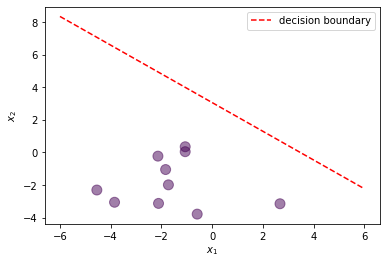

In [10]:
## plot the data and decision boundary
plt.scatter(x_data[:,0][:10], x_data[:,1][:10], c=y_data.reshape(100)[:10], s=100, alpha=0.5)
x_axis = np.linspace(-6, 6, 100)
y_axis = -(w1[0] + x_axis*w0[0][0]) / w0[0][1]
line_up, = plt.plot(x_axis, y_axis,'r--', label='decision boundary')
plt.legend(handles=[line_up])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
#plt.show()
plt.savefig ( "01_logit.png" )

In [ ]:
plt.scatter(x_data[:,0][50:], x_data[:,1][50:], c=y_data.reshape(100)[50:], s=100, alpha=0.5)